In [8]:
!pip3 install tensorflow opencv-python matplotlib

In [12]:
!pip3 install numpy pandas 

In [13]:
!pip3 install scikit-learn

In [14]:
!pip3 install keras

In [15]:
!pip3 list

Package                       Version
----------------------------- ---------------
absl-py                       2.0.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs     

In [16]:
import os,sys
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [17]:
os.listdir('data')

['healthy', 'infected']

In [19]:
"""
cpus=tf.config.experimental.list_physical_devices('CPU')
cpus
for cpu in cpus:
    tf.config.experimental.set_memory_growth(cpu,True)
"""

"\ncpus=tf.config.experimental.list_physical_devices('CPU')\ncpus\nfor cpu in cpus:\n    tf.config.experimental.set_memory_growth(cpu,True)\n"

In [20]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 2152 files belonging to 2 classes.


In [22]:
data=data.map(lambda x,y:(x/255,y))
data_iterator=data.as_numpy_iterator()
batch=data_iterator.next()
batch[1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [23]:
print(batch[0].min(),batch[0].max())


0.0 0.003921569


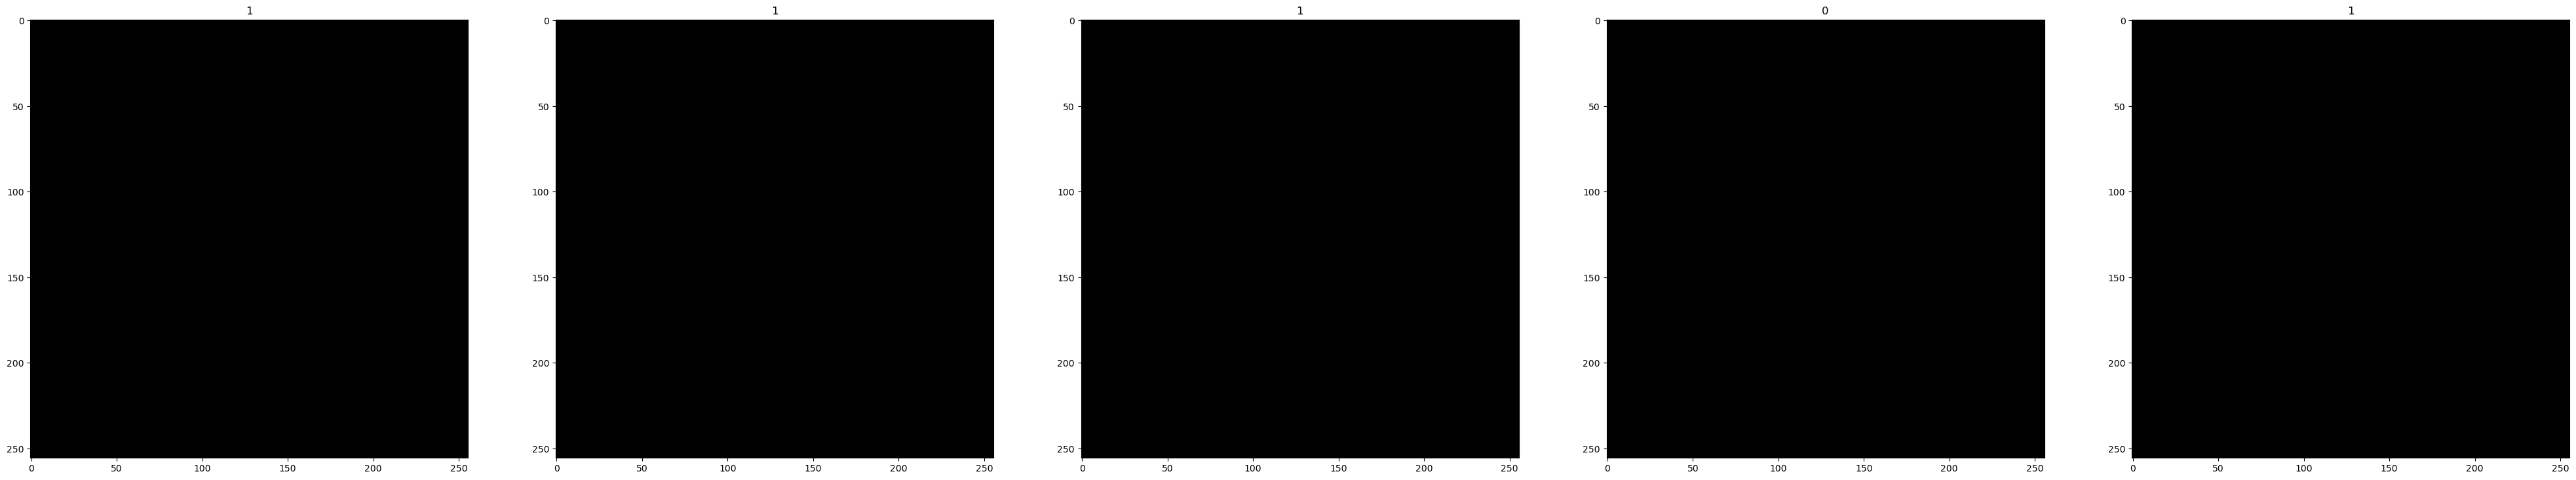

In [49]:
fix,ax=plt.subplots(ncols=5,figsize=(50,50))
for idx,img in enumerate(batch[0][:5]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [25]:
data_size=len(data)
train_size=int(data_size*.7)
val_size=int(data_size*.2)+1
test_size=int(data_size*.1)+1

In [26]:
print(data_size)
print(train_size,val_size,test_size)
print(train_size+val_size+test_size)

68
47 14 7
68


In [27]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [29]:
model = Sequential()

In [30]:
model.add(Conv2D(16,(3,3), 1,activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3), 1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3), 1,activation='relu'))
model.add(MaxPooling2D())
          
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [31]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [32]:
logdir='logs'
tensorboard_callback= tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
hist = model.fit(train,epochs=5,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/5


47/47 [==============================] - 249s 3s/step - loss: 0.2984 - accuracy: 0.9122 - val_loss: 0.2282 - val_accuracy: 0.9397
Epoch 2/5
47/47 [==============================] - 56s 1s/step - loss: 0.2594 - accuracy: 0.9295 - val_loss: 0.2676 - val_accuracy: 0.9263
Epoch 3/5
47/47 [==============================] - 53s 1s/step - loss: 0.2536 - accuracy: 0.9335 - val_loss: 0.2653 - val_accuracy: 0.9263
Epoch 4/5
47/47 [==============================] - 32s 664ms/step - loss: 0.2585 - accuracy: 0.9348 - val_loss: 0.2601 - val_accuracy: 0.9286
Epoch 5/5
47/47 [==============================] - 36s 755ms/step - loss: 0.2460 - accuracy: 0.9362 - val_loss: 0.2518 - val_accuracy: 0.9308


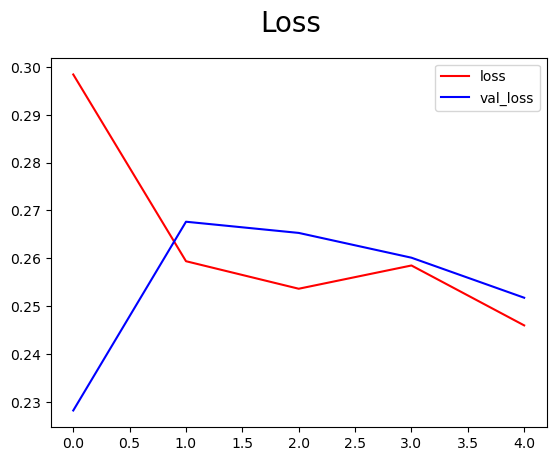

In [34]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='red',label='loss')
plt.plot(hist.history['val_loss'],color='blue',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper right")
plt.show()

In [35]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [36]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [37]:
for batch in test.as_numpy_iterator():
    x,y=batch
    res=model.predict(x)
    pre.update_state(y,res)
    re.update_state(y,res)
    acc.update_state(y,res)


1/1 [==============================] - 3s 3s/step


In [38]:
print(f'precision:{pre.result()}, Recall:{re.result()}, Accuracy:{acc.result()}')

precision:0.8949999809265137, Recall:1.0, Accuracy:0.8949999809265137


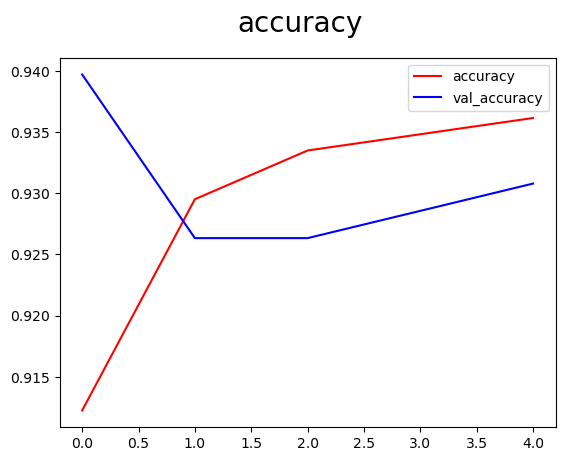

In [39]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='red',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='blue',label='val_accuracy')
fig.suptitle('accuracy',fontsize=20)
plt.legend(loc="upper right")
plt.show()

In [40]:
import cv2

In [44]:
img = cv2.imread('healthy_test2.jpg')

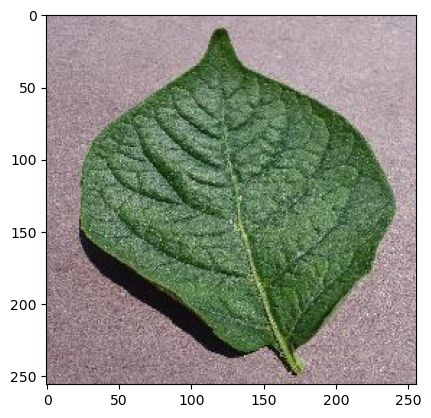

In [45]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

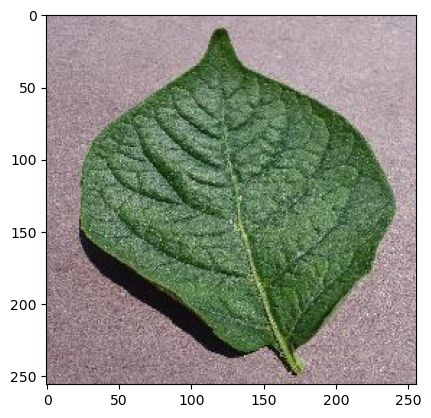

In [46]:
resize= tf.image.resize(img, (256, 256))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [47]:
res = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 6s 6s/step


In [48]:
res

array([[1.]], dtype=float32)